# Kaggle Competition

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn library for model building
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Ignoring warnings
import warnings

warnings.filterwarnings('ignore')

# Loading the dataset


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploring the dataset

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Since Cabin has a lot of null values, it will not be useful for our model. Age can be filled either with the mean, median or mode, depending on the bservation of the data. Also, PassangersID, Name and ticket willbe irrelevant in predicting our model as the are unique values.

In [7]:
# Checking the nuber of survived and not survived
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# Checking survival amongst sex
new_df = df_train[['Sex', 'Survived']]
gp = new_df.groupby(['Sex'])

m = gp.get_group('male')
print(m.value_counts())

fm = gp.get_group('female')
print(fm.value_counts())

Sex   Survived
male  0           468
      1           109
dtype: int64
Sex     Survived
female  1           233
        0            81
dtype: int64


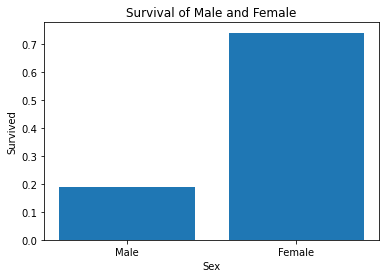

In [9]:
# Let's visualize this
male_sur = df_train[df_train.Sex == "male"]["Survived"]
fmale_sur = df_train[df_train.Sex == "female"]["Survived"]

plt.bar(['Male', 'Female'], [sum(male_sur)/ len(male_sur), sum(fmale_sur)/ len(fmale_sur)])
plt.title("Survival of Male and Female")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

In [10]:
# finding categorical variables

categorical = [var for var in df_train.columns if df_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
# check missing values in categorical variables

df_train[categorical].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [12]:
# view frequency counts of values in the variables

for col in df_train.columns: 
    if col in ['Name', 'Ticket', 'Cabin', 'PassangerID']:
        continue
    else:
        print(df_train[col].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Text(0.5, 1.0, 'Heatmap of Predictor Correlation Matrix of the Data')

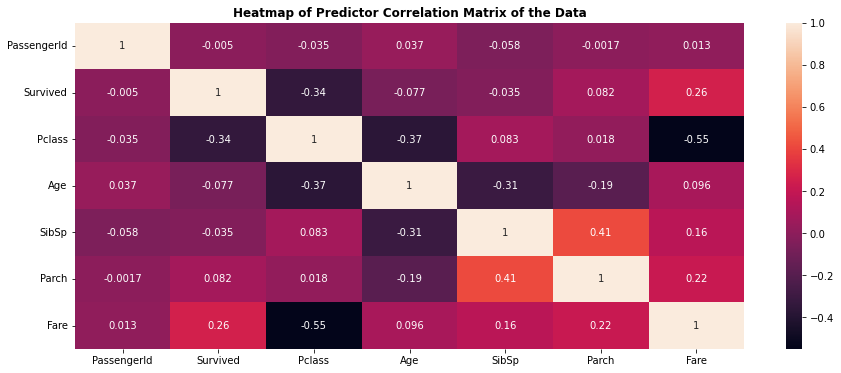

In [13]:
# Chaeck for correlation
corr_matrix = df_train.corr()
plt.figure(figsize=(15,6))

sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Predictor Correlation Matrix of the Data', fontweight = 'bold')

There is a high correlation negative between Pclass and Fare, this should be because 1st class pays the highest and 3rd class pays the lowest. Therefore fare would be an additional noise to the model as it's contribution to prediction is very limiting.

Since parch and Sibsp means extras going with travellers, we can combine the two variables into one feature as the both have a low correlation with the survied

# Preprocessing

Fill null values. 

In [14]:
# Reconfirm null values
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Density'>

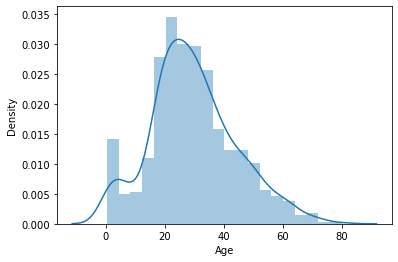

In [15]:
# Checking the distribution of age
sns.distplot(df_train['Age']) 

Since distribution is a bit skewed to the right, the most frequent values will be a better replacement than the mean

In [16]:
# Apply imputer on Age and Embarked columns (since embarked has only 2 null values)
imputer = SimpleImputer(strategy='most_frequent')
df_train[['Age', 'Embarked']] = imputer.fit_transform(df_train[['Age', 'Embarked']])

# Check for missing values after filling null values
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Putting together all needed variables for the model which are Pclass, Sex, Age, Combined SibSp and Parch, Embarked.

In [17]:
X = df_train[["Pclass", "Sex", "Age", "Embarked"]]
X.head()

,Pclass,Sex,Age,Embarked
0,3,male,22.0,S
1,1,female,38.0,C
2,3,female,26.0,S
3,1,female,35.0,S
4,3,male,35.0,S


In [18]:
# Combine SibSp and Parch into a variable called Attachment
X.insert(0, "Attachment", df_train.SibSp + df_train.Parch, True)
X.head()

,Attachment,Pclass,Sex,Age,Embarked
0,1,3,male,22.0,S
1,1,1,female,38.0,C
2,0,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [19]:
# Encoding categorical data
#looping through the columns to encode features with object datatype 
cols=X.columns
Encoder=LabelEncoder()
for col in cols:
    if col in ['Sex','Embarked']:
        X[col]=Encoder.fit_transform(X[col])
X.head()

,Attachment,Pclass,Sex,Age,Embarked
0,1,3,1,22.0,2
1,1,1,0,38.0,0
2,0,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


In [20]:
y = df_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Replicating same process on the test dataset

In [21]:
# Check for missing values in the test dataset
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [22]:
# Apply imputer on Age 
imputer = SimpleImputer(strategy='most_frequent')
df_test[['Age', 'Fare']] = imputer.fit_transform(df_test[['Age', 'Fare']])

# Check for missing values after filling null values
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [23]:
X_test = df_test[["Pclass", "Sex", "Age", "Embarked"]]

# Combine SibSp and Parch into a variable called Attachment
X_test.insert(0, "Attachment", df_test.SibSp + df_test.Parch, True)

# Encoding categorical data
#looping through the columns to encode features with object datatype 
cols=X_test.columns
Encoder=LabelEncoder()
for col in cols:
    if col in ['Sex','Embarked']:
        X_test[col]=Encoder.fit_transform(X_test[col])
X_test.head()

# X_test = scalar.transform(X_test)

# # Covert array to a dataframe
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_test.head()

,Attachment,Pclass,Sex,Age,Embarked
0,0,3,1,34.5,1
1,1,3,0,47.0,2
2,0,2,1,62.0,1
3,0,3,1,27.0,2
4,2,3,0,22.0,2


# Building the model

# Random Forest Classifier

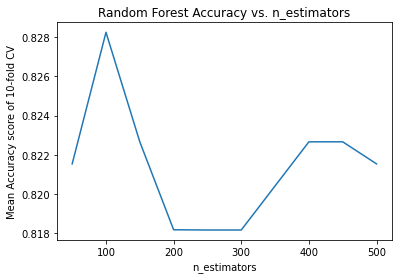

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]


In [34]:
# Let's see how a Randomforestclassifier would perform using cross validation
rf_score = []
n_estimators = []
m = 10
mult = 50  # n_estimators will be a multiple of 50
for i in range(m):
    est = (i + 1) * mult
    rf = RandomForestClassifier(n_estimators=est, max_depth=3, random_state=42)
    scores = cross_val_score(rf, X, y, cv=10)
    rf_score.append(np.mean(scores))
    n_estimators.append(est)
    
# visualize the accuracy
plt.plot(n_estimators, rf_score)
plt.xlabel("n_estimators")
plt.ylabel("Mean Accuracy score of 10-fold CV")
plt.title("Random Forest Accuracy vs. n_estimators")
plt.show()

print(n_estimators)

# Artificial Neural Networks

Let's see how ANN as compared to the Random Forest Classifier

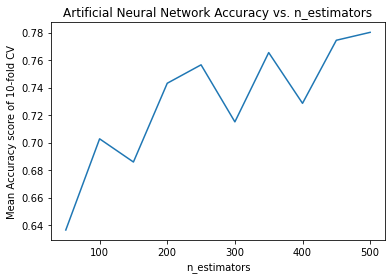

In [25]:
# Let's see how ANN would perform using cross validation
ann_score = []
n_estimators = []
m = 10
mult = 50  # n_estimators will be a multiple of 50
for i in range(m):
    est = (i + 1) * mult
    mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=est)
    scores = cross_val_score(mlp, X, y, cv=10)
    ann_score.append(np.mean(scores))
    n_estimators.append(est)
    
# visualize the accuracy
plt.plot(n_estimators, ann_score)
plt.xlabel("n_estimators")
plt.ylabel("Mean Accuracy score of 10-fold CV")
plt.title("Artificial Neural Network Accuracy vs. n_estimators")
plt.show()

This shows that the Random Forest of 100 estimates and 3 max_depth performed slightly better than the Artifitial Neural Network. 

In [36]:
# Using RF to predict the test dataset
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X, y)

# Get predictions on test data
y_preds = model.predict(X_test)

# Save to CSV file
output = pd.DataFrame({'PassengerId': df_test.PassengerId,
                      'Survived': y_preds})
output.to_csv('submission_rf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
